## Network Intrusion Detector (KDD Cup 1999)

<body> Detecting network intrusions is vital to protecting computer networks from unauthorized users. The 1999 KDD cup tasked participants with building a predictive model, such as a classifier, to detect intrusions on a dummy U.S. Air Force local-area-network (LAN). The data was processed from nine weeks worth of network traffic with four dozen features and a label of normal request (n = 13K) or some form of abnormal request (n = 11K) for each data point (i.e: request to connect). The data set used for this analysis is the [NSL-KDD data set](https://web.archive.org/web/20150205070216/http://nsl.cs.unb.ca/NSL-KDD/) with the following [description of features included in the data set](http://kdd.ics.uci.edu/databases/kddcup99/task.html).</body> 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import time

%matplotlib inline

In [2]:
colnames = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

kddtrain = pd.read_csv("nslkddtrain.csv", header = None, names = colnames)
kddtest = pd.read_csv("nslkddtest.csv", header = None, names = colnames)

In [3]:
pd.options.display.max_columns = 50 # display all columns

kddtrain.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
kddtest.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan


## Workflow
<body>
1. Relabel data points as normal or abnormal for test set.  
2. Preprocess data.  
3. Identify relevant features.  
4. KNN or some other density based classification algorithm (GMM, kerndel density estimates) or GLMs (logistic regression) 
</body>

In [5]:
# relabel all attacks as anormaly
kddtest["label"][kddtest["label"] != "normal"] = "anomaly"

C:\Users\XX\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [6]:
kddtest.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,anomaly
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,anomaly


### Functions used in this notebook

In [7]:
def preprocess(train, test, toscale):
    
    """ Scale and normalize continuous features in training and testing set based on training set
        
        Input:
            1. train - dataframe containing all features for training set
            2. test - dataframe containing all features for training set
            3. toscale - list of continouse features to scale
        
        Output:
            1. train - training set after processing continuous features
            2. test - testing set after processing continuous features
    """
    
    scaler = sklearn.preprocessing.MinMaxScaler()
    for feat in toscale:
        fited = scaler.fit(pd.DataFrame(train[feat]))
        test[feat] = fited.transform(pd.DataFrame(test[feat]))
        train[feat] = fited.transform(pd.DataFrame(train[feat]))
        
    return train, test

In [8]:
def dropfeature(df, feature):
    
    """ Drop features from dataframe 
    
    Input:
        1. df - dataframe containing all the data points and features
        2. feature - list of features to be dropped from dataframe
    
    Output:
        1. df - dataframe after removing some features
    """
    return df.drop(feature, axis = 1)
    
    

In [9]:
def binarize(y_true):
    
    """
    Convert normal or abnormal into list of binary outcomes
    
    Input:
        1. y_true - list of normal and abnormal
    Output:
        1. y_true2 - binarized y_true
        
    """
    from sklearn import preprocessing
    le = preprocessing.LabelEncoder()
    le.fit(["normal", "anomaly"]) # normal 1, abnormal 0
    y_true2 = le.transform(y_true)
    
    return y_true2

In [10]:
def dummify(df, feature):
    
    """ Replace discrete features from dataframe with dummy variables
    
    Input:
        1. df - dataframe containing all the data points and features
        2. feature - one feature to be turned into dummy variables
    
    Output:
        1. df - dataframe with dummy variables instead of the discrete feature
    
    NOTE: add dummy variables only after scaling data
    """
    dummy = pd.get_dummies(df[feature], prefix = feature)
    df = df.drop(feature, axis = 1,)
    df = df.join(dummy.ix[:, 1:]) # remove one dummy variable to avoid multicolinearity
    
    return df

In [11]:
def catcompareplots(df, feature):
    
    """ Compare discrete feature differences between normal and abnormal requests
    
    Input:
        1. df - dataframe containing all the data points and features
        2. feature - list of features to be compared between normal and abnormal requests
    
    Output:
        1. Count plots comparing normal and abnormal requests for each feature
        
    """
    a = time.time()
    fignum = 1
    for feat in feature:
        plt.figure(fignum)
        sns.countplot(x = feat, hue ="label", data = df)
        plt.yscale("log")
        fignum = fignum + 1
        
    print time.time() - a, "seconds"

    return

In [12]:
def contcompareplots(df, feature):
    """ Compare continuous differences between normal and abnormal requests
    
    Input:
        1. df - dataframe containing all the data points and features
        2. feature - list of features to be compared between normal and abnormal requests
    
    Output:
        1. Violin plots comparing normal and abnormal requests for each feature
        
    """
    a = time.time()
    
    fignum = 1 # counter for number of plots 
    for feat in feature:
        plt.figure(fignum)
        sns.violinplot(x = feat, y = "label", cut = 0, scale = "count", data = df)
        fignum = fignum + 1

    print time.time() - a, "seconds"
    
    return

In [13]:
def histcompareplots(df, feature):
    """ Compare continuous differences between normal and abnormal requests
    
    Input:
        1. df - dataframe containing all the data points and features
        2. feature - list of features to be compared between normal and abnormal requests

    Output:
        1. Overlaid histogram plots of normal and abnormal requests for each feature
        
    """
    a = time.time()
    
    # split into normal and abnormal data frames
    norm = df[df["label"] == "normal"]
    abnorm = df[df["label"] != "normal"]
    
    if type(feature) == str:
        plt.ylabel("Counts")
        plt.xlabel(feature)
        bins = np.linspace(min(df[feature]), 1, 100).tolist() + np.linspace(1, max(df[feature]), 100).tolist()
        norm[feature].plot.hist(alpha = 0.5, bins = bins)
        abnorm[feature].plot.hist(alpha = 0.5, bins = bins)
        plt.yscale("log")
        plt.legend(["normal", "abnormal"])
        plt.title("Comparision of %s between normal & abnormal requests \n" %feature)        

    else:
        fignum = 1 # counter for number of plots 
        for feat in feature:
            plt.figure()
            plt.ylabel("Counts")
            plt.xlabel(feat)
            bins = np.linspace(min(df[feat]), 1, 100).tolist() + np.linspace(1, max(df[feat]), 100).tolist()
            norm[feat].plot.hist(alpha = 0.5, bins = bins)
            abnorm[feat].plot.hist(alpha = 0.5, bins = bins)
            plt.yscale("log")
            plt.legend(["normal", "abnormal"])
            plt.title("Comparision of %s between normal & abnormal requests \n" %feat)        

            fignum = fignum + 1

    print time.time() - a, "seconds"
    
    return

In [14]:
def gridsearch(estimator, df, target, param_grid, scoring = 'f1', jobs = -2):
    """ Grid search for paramters to tune estimator on training set
        
        Input:
            1. estimator - classification model with parameters to tune
            2. df - dataframe for training set after preprocessing and target labels
            3. target - labels for training set
            4. param_grid - values to try for tuning parameters of estimator
            5. scoring - metric to use for scoring estimator, default is F1 score
            6. jobs - processors to use, default is -2 (one less processor than total)
            
        Output:
            1. clf.best_estimator_ - estimator chosen from grid search
    
    """
    from sklearn import grid_search
    
    a = time.time()
    
    clf = grid_search.GridSearchCV(estimator = estimator, param_grid = param_grid,
                                   scoring = scoring, n_jobs = jobs)
    clf.fit(df, target)
    
    print time.time() - a, " seconds"
    print "\n best parameters : ", clf.best_params_
    # print "\n grid score : ", clf.grid_scores_
    print "\n best estimator: ", clf.best_estimator_
    
    return clf
    

In [109]:
def Find_Optimal_Cutoff(target, predicted, classifier):
    
    """ 
    Find the optimal probability cutoff point for a classification model related to event rate
    Parameters, from stackoverflow
    
    Input:
        1. target - true labels 
        2. predicted - predicted labels

    Output:
        1. plot of ROC curve
        2. optimal threshold value

    """
    from sklearn.metrics import roc_curve, auc
    
    plt.figure()
    fpr, tpr, thresholds = roc_curve(target, predicted)
    roc_auc = auc(fpr,tpr)
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.plot(fpr, tpr, label = ' AUC = %0.2f)' % (roc_auc))
    plt.legend(loc = 'lower right')
    plt.plot([0,1],[0,1],'--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve of Classifying Network Requests by %s \n' %classifier)

    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(thresholds, index=i)})
    roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t["threshold"]) 

In [15]:
def plot_confusion_matrix(truth, predicted, labels={}, save_name='', 
                          title='Confusion Matrix', norm=1, suppress_values=False, font_size=16):
    
    """ Plot confusion matrix and show classification metrics (F1, sensitivity, recall) adapted from Mike Luk
    
    Input: 
        1. truth, predicted - list of labels for the actual data set and prediction
        2. labels - dictionary with key as integer and value as name of label (i.e. labels = {0: "null",1:"attack"} or somesuch)
        3. title - title to show on confusion matrix plot
        4. norm - normalize values in confusion matrix to [0,1)
        5. suppress_values - show normalized values in confusion matrix, default is show = False
        6. font_size - font size in plot of confusion matrix, default is 16
    
    Output: 
        1. classification metrics and confusion matrix rendered in a plot
    """
    # make confusion matrix from truth and predicted for classes
    # define the confusion matrix
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    
    conf_mat = confusion_matrix(truth,predicted)

    #normalise
    if norm:
        conf_mat =  conf_mat.astype('float')/conf_mat.sum(axis=1)[:, np.newaxis]

    fig = plt.figure(figsize=(5,5))
    width = np.shape(conf_mat)[1]
    height = np.shape(conf_mat)[0]

    res = plt.imshow(np.array(conf_mat), cmap=plt.cm.summer, interpolation='nearest')
    cb = fig.colorbar(res)

    if not suppress_values:
        for i, row in enumerate(conf_mat):
            for j, c in enumerate(row):
                if c>0:
                    if norm:
                        d = round(c,2)
                        plt.text(j-.1, i+.0, d, fontsize=font_size)
                    else:
                        plt.text(j-.1, i+.0, c, fontsize=font_size)

    # set axes
    if labels !={}:
        _ = plt.xticks(range(len(labels)), [labels[l] for l in labels], rotation=90, fontsize=font_size)
        _ = plt.yticks(range(len(labels)), [labels[l] for l in labels],fontsize=font_size)
        print(classification_report(truth, predicted,target_names=[l for l in labels.values()]))

    plt.xlabel('Predicted',fontsize=font_size+4)
    plt.ylabel('Truth',fontsize=font_size+4)
    plt.title(title,fontsize=font_size+5)
    
    return    

## Looking at continuous features

6.10399985313 seconds


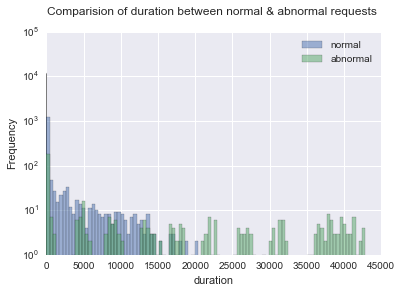

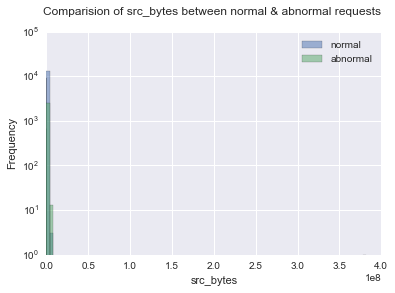

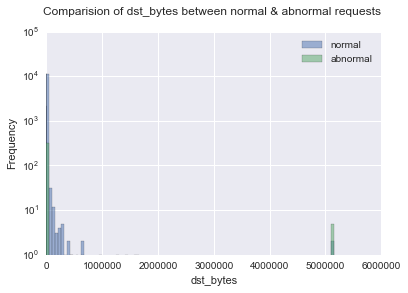

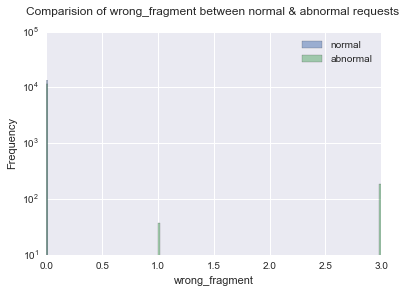

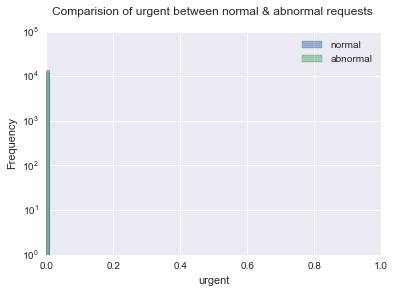

In [16]:
# looking at continuous features
feature = [ "duration", "src_bytes","dst_bytes", 'wrong_fragment', 'urgent']
histcompareplots(kddtrain, feature)

1.74799990654 seconds


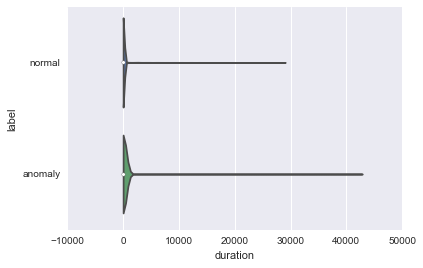

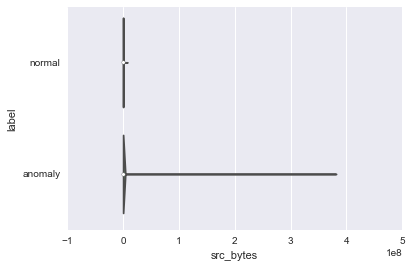

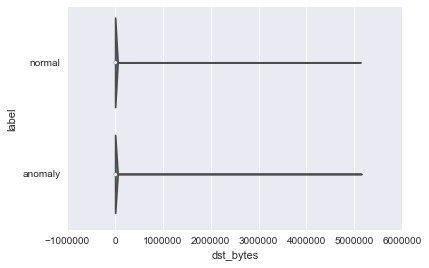

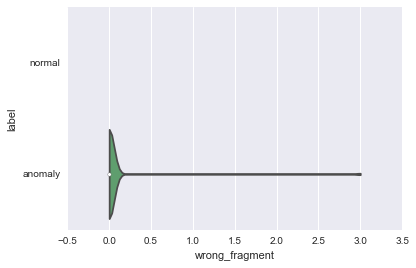

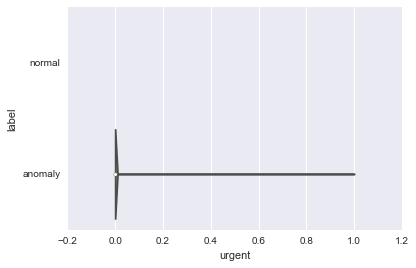

In [17]:
contcompareplots(kddtrain, feature) # large outliers present and most values are zeros

In [18]:
kddtrain.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.0,25192.0,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,0.001548,0.001350,0.249841,0.014727,0.000357,0.004327,0.0,0.0,0.009130,84.591180,27.698754,0.286338,0.283762,0.118630,0.120260,0.660559,0.062363,0.095931,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,0.039316,0.048785,11.500842,0.529602,0.018898,0.098524,0.0,0.0,0.095115,114.673451,72.468242,0.447312,0.447599,0.318745,0.322335,0.439637,0.178550,0.256583,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,144.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,1.000000,2.000000,975.000000,40.000000,1.000000,8.000000,0.0,0.0,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<body>

After looking at the distribution and interquartile ranges of continuous features, it is evident that a lot of these features have zero values with some large outliers, hence resulting in a discrepancy between the mean and median value. Scaling and normalization with minmax scaler would be better than robust scaler or standard scaler in this case to avoid large variances or zero IQRs. </body>

## Looking at discrete features

1.94200015068 seconds


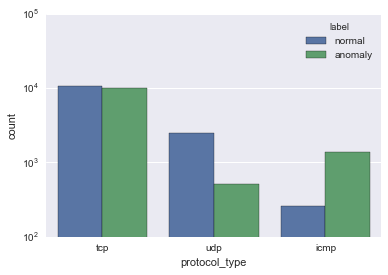

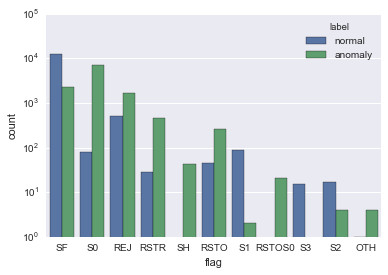

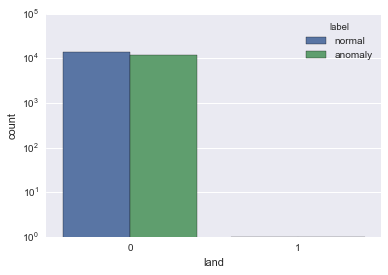

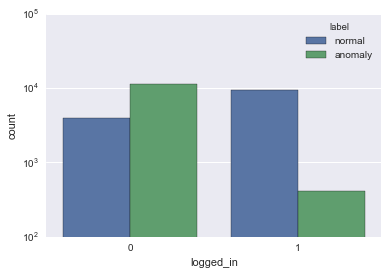

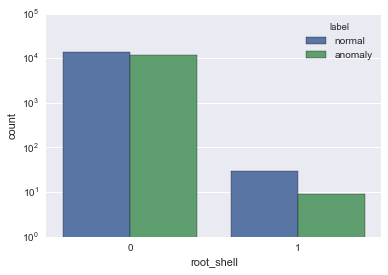

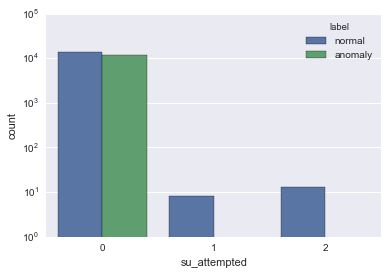

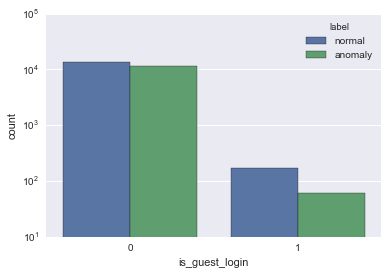

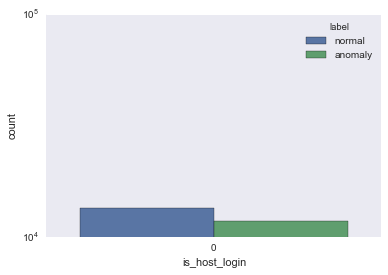

In [19]:
catfeature = ["protocol_type","flag", "land", "logged_in", "root_shell", 
             "su_attempted",  "is_guest_login", "is_host_login"]
catcompareplots(kddtrain, catfeature)

<body>
Looking at the discrete features, logged_in and flag, SF and SO in particular, looks promising for directly classifying normal or abnormal requests. The discrete features will be turned into dummy variables. 
</body>

In [20]:
y_true = binarize(kddtest["label"]) # abnormal is 0, normal is 1

# check for consistency
print sum(1 for idx in kddtest.index if kddtest.ix[idx]["label"] == "normal" )
print sum(1 for i in y_true if i == 1)

9711
9711


<body> 
Now scale and normalize continuous features, drop unwanted discrete features and transform retained discrete features into dummy variables.
</body>

In [21]:
# change discrete features into dummy variables, only need to change flag and protocol_type
kddtrain = dummify(kddtrain, "flag")
kddtrain = dummify(kddtrain, "protocol_type")

kddtest = dummify(kddtest, "flag")
kddtest = dummify(kddtest, "protocol_type")

In [22]:
# different number of services between kddtrain and kddtest
kddtrain = kddtrain.drop("service", axis = 1)
kddtest = kddtest.drop("service", axis = 1)

In [23]:
# list of features to scale
toscale = kddtrain.columns.values.tolist()

In [25]:
toscale = ['duration',
 'src_bytes',
 'dst_bytes',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'num_compromised',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate'] # keep only continuous features

In [26]:
kddtrain, kddtest = preprocess(kddtrain, kddtest, toscale)

In [27]:
kddtest.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,...,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,protocol_type_tcp,protocol_type_udp
0,0.000000,0.000000e+00,0.000000,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.447059,0.017647,0.0,0.00,1.0,1.0,...,0.06,0.00,1.000000,0.039216,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.000000e+00,0.000000,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.264706,0.000000,0.0,0.00,1.0,1.0,...,0.06,0.00,1.000000,0.003922,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000047,3.401281e-05,0.000000,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.000000,0.000000,0.0,0.00,0.0,0.0,...,0.00,0.00,0.525490,0.337255,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.000000,5.239592e-08,0.000000,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.000000,0.125490,0.0,0.00,0.0,0.0,...,0.00,1.00,0.011765,0.223529,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,anomaly,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.000023,0.000000e+00,0.000003,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.000000,0.013725,0.0,0.12,1.0,0.5,...,0.00,0.75,0.113725,0.337255,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,anomaly,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [28]:
kddtrain.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,...,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,protocol_type_tcp,protocol_type_udp
0,0.0,1.286320e-06,0.000000,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.001961,0.001961,0.0,0.0,0.0,0.0,...,0.00,0.00,0.588235,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,3.824902e-07,0.000000,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.023529,0.000000,0.0,0.0,0.0,0.0,...,0.15,0.00,1.000000,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.000000e+00,0.000000,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.239216,0.009804,1.0,1.0,0.0,0.0,...,0.07,0.00,1.000000,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,6.077927e-07,0.001583,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.007843,0.007843,0.2,0.2,0.0,0.0,...,0.00,0.00,0.117647,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,5.213394e-07,0.000082,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.056863,0.060784,0.0,0.0,0.0,0.0,...,0.00,0.09,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


### KNN Classification

<body>
Classification by KNN with parameter tuning. 
</body>

In [29]:
true_label = binarize(kddtrain["label"])

print sum(true_label) # check that normal is 1
print kddtrain["label"].value_counts()

13449
normal     13449
anomaly    11743
Name: label, dtype: int64


In [30]:
kddtrain = kddtrain.drop("label", axis = 1)
test_label = binarize(kddtest["label"])
kddtest = kddtest.drop("label", axis = 1)

In [32]:
from sklearn.neighbors import KNeighborsClassifier as knn
knn_param_grid = [{'n_neighbors': np.arange(1, 21, 4), 
                  'weights':['uniform', 'distance']}]

In [33]:
# grid search for tuning parameters of knn, 8 min
knn_best = gridsearch(knn(), kddtrain, true_label, knn_param_grid)

447.253000021  seconds

 best parameters :  {'n_neighbors': 1, 'weights': 'uniform'}

 best estimator:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


In [34]:
print knn_best.best_estimator_ # k = 1 is surprisingly the best 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


In [35]:
pred_label = knn_best.predict(kddtest)

             precision    recall  f1-score   support

     Normal       0.97      0.63      0.77     12833
   Abnormal       0.67      0.98      0.79      9711

avg / total       0.84      0.78      0.78     22544



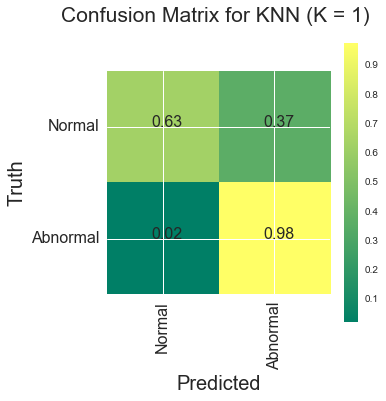

In [36]:
plot_confusion_matrix(test_label, pred_label, {0:"Normal", 1:"Abnormal"}, title = "Confusion Matrix for KNN (K = 1) \n \n") 

             precision    recall  f1-score   support

     Normal       0.97      0.64      0.77     12833
   Abnormal       0.67      0.97      0.79      9711

avg / total       0.84      0.78      0.78     22544



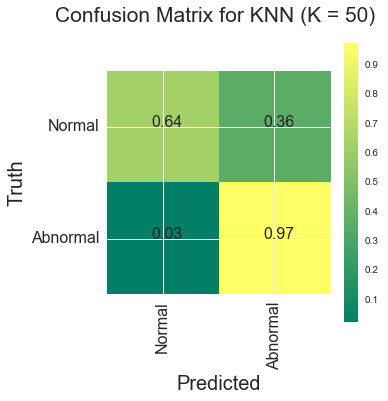

In [37]:
# trying knn with n = 50, weight = uniform
clf2 = knn(n_neighbors = 50, weights = 'uniform')
clf2.fit(kddtrain, true_label)
pred_label2 = clf2.predict(kddtest)
plot_confusion_matrix(test_label, pred_label2, {0:"Normal", 1:"Abnormal"}, title = "Confusion Matrix for KNN (K = 50) \n \n") 

## Nearest Centroid Classification
<body>
Similar to KNN except each class is represented by its centroid and test samples are classified base on the closest centroid. 
</body>

In [38]:
from sklearn.neighbors import NearestCentroid as nc

In [39]:
nc_param_grid = dict(metric = ["euclidean", "manhattan"], shrink_threshold = np.linspace(0, 10, 100))

# grid search for tuning parameters of nearet cenroid
nc_best = gridsearch(nc(), kddtrain, true_label, nc_param_grid)

58.5409998894  seconds

 best parameters :  {'metric': 'euclidean', 'shrink_threshold': 9.7979797979797976}

 best estimator:  NearestCentroid(metric='euclidean', shrink_threshold=9.7979797979797976)


             precision    recall  f1-score   support

     Normal       0.98      0.55      0.71     12833
   Abnormal       0.63      0.99      0.77      9711

avg / total       0.83      0.74      0.73     22544



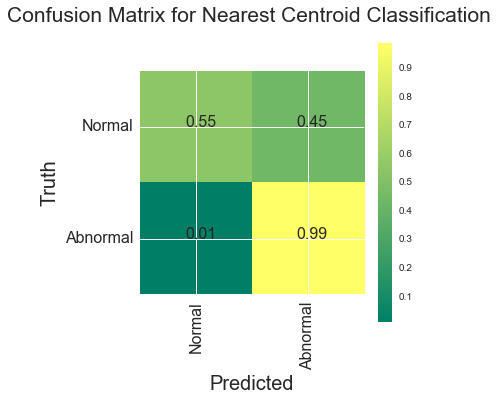

In [40]:
nc_pred = nc_best.predict(kddtest)
plot_confusion_matrix(test_label, nc_pred, {0:"Normal", 1:"Abnormal"}, title = "Confusion Matrix for Nearest Centroid Classification \n \n") # similar result as knn 

## Logistic Regression
<body>
Logistic regression with L1 regularization as most of the features for detecting network intrusion are believed to be noise and only a few important features (eg: logged_in, duration) are informative. L2 regularization is included during the parameter tuning phase.
</body>

In [41]:
from sklearn.linear_model import LogisticRegression as lr

In [42]:
lr_param_grid = dict(C = np.linspace(0.01, 2, 20), penalty = ['l1', 'l2'])
lr_best = gridsearch(lr(), kddtrain, true_label, lr_param_grid)

45.5749998093  seconds

 best parameters :  {'penalty': 'l1', 'C': 1.8952631578947368}

 best estimator:  LogisticRegression(C=1.8952631578947368, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


             precision    recall  f1-score   support

     Normal       0.93      0.62      0.74     12833
   Abnormal       0.65      0.93      0.77      9711

avg / total       0.81      0.75      0.75     22544



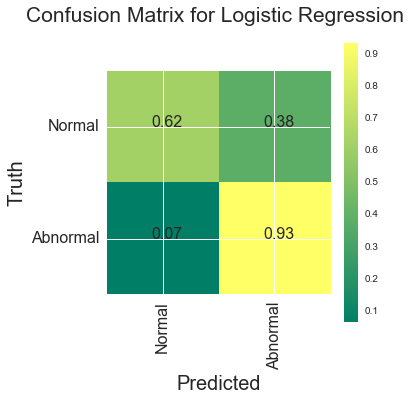

In [44]:
lr_pred = lr_best.predict(kddtest)
plot_confusion_matrix(test_label, lr_pred, {0:"Normal", 1:"Abnormal"}, title = "Confusion Matrix for Logistic Regression \n \n")

In [45]:
# 25524 by 2 array showing proabability for each sample belonging to abnormal or normal
lr_prob = lr_best.predict_proba(kddtest)  
lr_prob

array([[ 0.99464856,  0.00535144],
       [ 0.98041259,  0.01958741],
       [ 0.05295854,  0.94704146],
       ..., 
       [ 0.02533249,  0.97466751],
       [ 0.0068866 ,  0.9931134 ],
       [ 0.39152554,  0.60847446]])

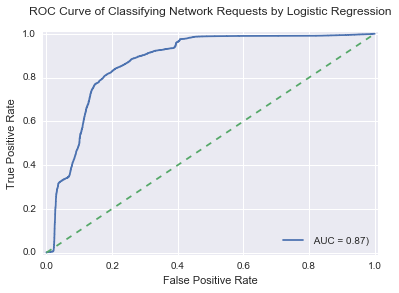

In [46]:
# plot ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(test_label, lr_prob[:, 1])
roc_auc = auc(fpr,tpr)
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, label = ' AUC = %0.2f)' % (roc_auc))
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Classifying Network Requests by Logistic Regression\n')

In [68]:
thres = Find_Optimal_Cutoff(test_label, lr_prob[:,1])
print thres

[0.97809086894442832]


             precision    recall  f1-score   support

     Normal       0.85      0.82      0.83     12833
   Abnormal       0.77      0.82      0.79      9711

avg / total       0.82      0.82      0.82     22544



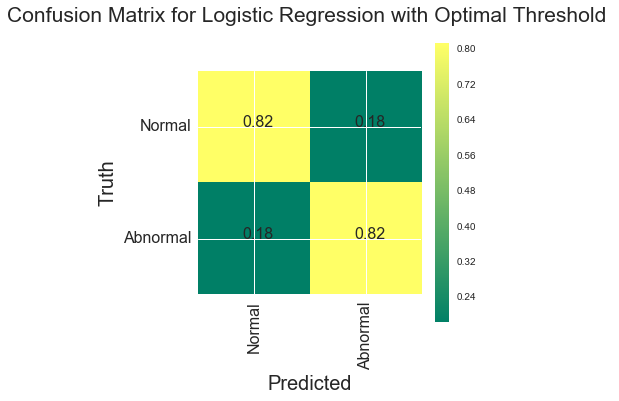

In [80]:
# repredict using optimal threshold
lr_pred2 = []
for x in lr_prob[:,1]:
    if x > thres:
        lr_pred2.append(1)
    else:
        lr_pred2.append(0)
        
plot_confusion_matrix(test_label, lr_pred2, {0:"Normal", 1:"Abnormal"}, title = "Confusion Matrix for Logistic Regression with Optimal Threshold \n \n")

## Gradient Boosting Classifier

<body> Ensemble method in sklearn most similar to xgboost </body>

In [93]:
from sklearn.ensemble import GradientBoostingClassifier as gb
gb_param_grid = dict(learning_rate = np.linspace(0.01, 2, 10), 
                     max_depth = np.arange(2, 10, 2), 
                     min_samples_split = np.arange(2, 6, 2),
                     max_features = ["sqrt", "log2"]
                    )

In [94]:
gb_best = gridsearch(gb(), kddtrain, true_label, gb_param_grid) # 15 min

C:\Users\XX\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


1085.31599998  seconds

 best parameters :  {'max_features': 'sqrt', 'min_samples_split': 2, 'learning_rate': 0.23111111111111113, 'max_depth': 8}

 best estimator:  GradientBoostingClassifier(init=None, learning_rate=0.23111111111111113,
              loss='deviance', max_depth=8, max_features='sqrt',
              max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)


In [95]:
gb_prob = gb_best.predict_proba(kddtest)

[0.9998898181373912]


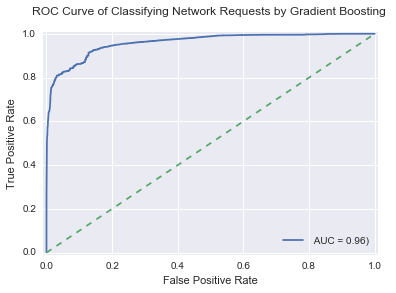

In [110]:
thres = Find_Optimal_Cutoff(test_label, gb_prob[:,1], "Gradient Boosting")
print thres

             precision    recall  f1-score   support

     Normal       0.91      0.88      0.89     12833
   Abnormal       0.85      0.88      0.87      9711

avg / total       0.88      0.88      0.88     22544



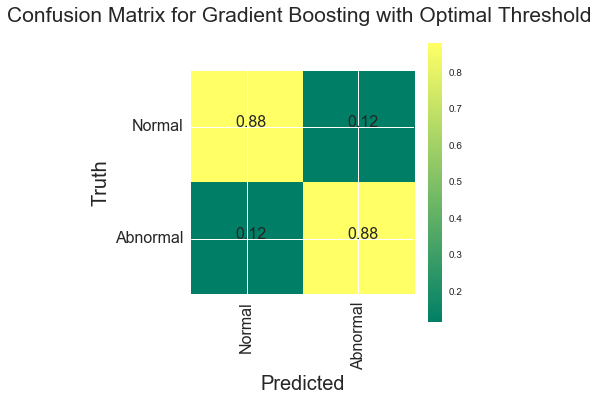

In [112]:
# repredict using optimal threshold
gb_pred2 = []
for x in gb_prob[:,1]:
    if x > thres:
        gb_pred2.append(1)
    else:
        gb_pred2.append(0)
        
plot_confusion_matrix(test_label, gb_pred2, {0:"Normal", 1:"Abnormal"}, title = "Confusion Matrix for Gradient Boosting with Optimal Threshold \n \n")